## Load the Dataset
We begin our EDA by loading the dataset into a pandas DataFrame. This allows us to work with the data using Python's pandas library, which provides powerful tools for data analysis.

## Basic Inspections
After loading the dataset, we'll perform some basic inspections to understand the structure of the data, including:
- The shape of the dataset to see how many listings (rows) and features (columns) it contains.
- The datatypes of the columns to ensure they are appropriate for the kind of data they represent.
- A quick view of the first few rows to get a feel for the data and its columns.


In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/Gatlinburg_1_2_bedrooms.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_618768441791215678,Unique 2bed/2bath w Mini-golf,390326326,2,8,https://www.airbnb.com/users/show/390326326,https://www.airbnb.com/rooms/618768441791215678,2.0,Sevierville,True,...,37876,5.0,362,171538,172545.50,516.680723,0.917127,200.0,71,4.951408
1,vrbo_1223464,Free Dollywood tix! Indoor Heated Swimming Po...,1223464,1,2,NaN,NaN,2.0,Sevierville,True,...,37876,0.0,362,164846,166176.59,490.613095,0.928177,95.0,375,4.900000
2,vrbo_337218ha,Beautiful large cabin with views. Falls spec...,337218ha,2,9,NaN,NaN,2.0,Sevierville,True,...,37862,3.0,348,164430,172063.36,501.310976,0.942529,150.0,48,4.700000
3,abnb_41811909,American Bearadise! It''s got a Pool!,135395100,2,10,https://www.airbnb.com/users/show/135395100,https://www.airbnb.com/rooms/41811909,2.5,Sevierville,True,...,37862,1.0,365,160166,160166.00,495.869969,0.884932,99.0,25,4.838000
4,abnb_646950128014135519,Bearfoot Splash,191544257,2,8,https://www.airbnb.com/users/show/191544257,https://www.airbnb.com/rooms/646950128014135519,2.5,Sevierville,True,...,37876,2.0,364,159556,159796.51,548.302405,0.799451,220.0,30,5.000000


In [2]:
data.info()
# Remove, PropertyID, TITLE, Property Manager, Airbnb URL, City_name (maybe),
# Has_Aircon, State_name, vrbo listing URL, Revenue Potential

#Remove rows with less than 10 reviews. this will reduce the chance of duplicates.


#Ask what is Instant_book: originally you had to inquire to book.

#what is superhost, if blank can this be False? Airbnb has a thing called superhost status. (remove this)

#Will need to investigate minimum stay, if zero is it safe to assume 1? Do people just book for the day and not stay the night?

#There are five unique zipcodes? Ask how zipcode might affect revenue?



#Available nights? It seems like the lower the available nights, the lower the revenue. (drop this)

#For cleaning fee, if it is missing or zero, is it safe to impute the value with the mean cleaning fee

# For property reviews did you say if less than (start with 10) do not pay attention to these? If so why?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                1969 non-null   object 
 1   TITLE                      1969 non-null   object 
 2   Property Manager/ Host ID  1969 non-null   object 
 3   BEDROOMS                   1969 non-null   int64  
 4   ACCOMMODATES               1969 non-null   int64  
 5   Airbnb Host URL            1174 non-null   object 
 6   Airbnb Listing URL         1173 non-null   object 
 7   BATHROOMS                  1968 non-null   float64
 8   CITY_NAME                  1969 non-null   object 
 9   HAS_AIRCON                 1969 non-null   bool   
 10  HAS_GYM                    1969 non-null   bool   
 11  HAS_HOTTUB                 1969 non-null   bool   
 12  HAS_KITCHEN                1969 non-null   bool   
 13  HAS_PARKING                1969 non-null   bool 

In [3]:
data.drop(columns=['Property ID', 'TITLE', 'Property Manager/ Host ID', 'Airbnb Host URL',
                'Airbnb Listing URL', 'CITY_NAME', 'HAS_AIRCON', 'STATE_NAME', 'SUPERHOST',
                'Vrbo Listing URL', 'Revenue Potential', 'MINIMUM_STAY', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'INSTANT_BOOK'], inplace=True)

In [4]:
data.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,Available Nights,Revenue,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
count,1969.000000,1969.000000,1968.000000,1969.000000,1969.000000,1962.000000,1962.000000,1936.000000,1969.000000,1969.000000
mean,1.718131,5.756221,1.889736,329.150838,66746.421026,260.947111,0.778960,126.381198,117.327577,4.762845
std,0.450024,2.868297,0.517155,66.764254,25209.635923,77.655497,0.154338,48.014526,102.387202,0.270117
min,1.000000,1.000000,0.500000,0.000000,0.000000,71.000000,0.120879,0.000000,10.000000,3.000000
25%,1.000000,4.000000,1.500000,330.000000,54532.000000,212.679555,0.694423,95.000000,32.000000,4.700000
50%,2.000000,6.000000,2.000000,355.000000,68309.000000,250.254630,0.808219,125.000000,89.000000,4.852809
75%,2.000000,7.000000,2.000000,363.000000,80449.000000,299.982491,0.898630,150.000000,173.000000,4.942857
max,2.000000,99.000000,4.000000,365.000000,171538.000000,1042.186667,1.000000,546.000000,607.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          1969 non-null   int64  
 1   ACCOMMODATES      1969 non-null   int64  
 2   BATHROOMS         1968 non-null   float64
 3   HAS_GYM           1969 non-null   bool   
 4   HAS_HOTTUB        1969 non-null   bool   
 5   HAS_KITCHEN       1969 non-null   bool   
 6   HAS_PARKING       1969 non-null   bool   
 7   HAS_PETS_ALLOWED  1969 non-null   bool   
 8   HAS_POOL          1969 non-null   bool   
 9   PRICE_TIER        1969 non-null   object 
 10  Available Nights  1969 non-null   int64  
 11  Revenue           1969 non-null   int64  
 12  ADR               1962 non-null   float64
 13  Occupancy         1962 non-null   float64
 14  Cleaning Fee      1936 non-null   float64
 15  Property Reviews  1969 non-null   int64  
 16  Property Rating   1969 non-null   float64


In [6]:
# Assuming your DataFrame is named df
data = data[data['Revenue'] >= 39999]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          1681 non-null   int64  
 1   ACCOMMODATES      1681 non-null   int64  
 2   BATHROOMS         1681 non-null   float64
 3   HAS_GYM           1681 non-null   bool   
 4   HAS_HOTTUB        1681 non-null   bool   
 5   HAS_KITCHEN       1681 non-null   bool   
 6   HAS_PARKING       1681 non-null   bool   
 7   HAS_PETS_ALLOWED  1681 non-null   bool   
 8   HAS_POOL          1681 non-null   bool   
 9   PRICE_TIER        1681 non-null   object 
 10  Available Nights  1681 non-null   int64  
 11  Revenue           1681 non-null   int64  
 12  ADR               1681 non-null   float64
 13  Occupancy         1681 non-null   float64
 14  Cleaning Fee      1671 non-null   float64
 15  Property Reviews  1681 non-null   int64  
 16  Property Rating   1681 non-null   float64


In [7]:
data.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,Available Nights,Revenue,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1671.000000,1681.000000,1681.000000
mean,1.732302,5.794765,1.914039,344.844140,73938.378941,271.322694,0.807548,129.558348,127.668650,4.782410
std,0.442891,1.968531,0.512248,31.061912,19049.693371,75.481313,0.123818,48.330103,104.500594,0.247493
min,1.000000,1.000000,0.500000,113.000000,40042.000000,131.269341,0.358904,0.000000,10.000000,3.209756
25%,1.000000,4.000000,2.000000,340.000000,60912.000000,222.588850,0.733894,99.000000,43.000000,4.700000
50%,2.000000,6.000000,2.000000,357.000000,72308.000000,258.365325,0.827309,125.000000,102.000000,4.879688
75%,2.000000,7.000000,2.000000,363.000000,83053.000000,306.384615,0.905444,155.000000,185.000000,4.950000
max,2.000000,14.000000,4.000000,365.000000,171538.000000,1042.186667,1.000000,546.000000,607.000000,5.000000


In [8]:
# Assuming your DataFrame is named df
data = data[data['Property Reviews'] >= 10]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          1681 non-null   int64  
 1   ACCOMMODATES      1681 non-null   int64  
 2   BATHROOMS         1681 non-null   float64
 3   HAS_GYM           1681 non-null   bool   
 4   HAS_HOTTUB        1681 non-null   bool   
 5   HAS_KITCHEN       1681 non-null   bool   
 6   HAS_PARKING       1681 non-null   bool   
 7   HAS_PETS_ALLOWED  1681 non-null   bool   
 8   HAS_POOL          1681 non-null   bool   
 9   PRICE_TIER        1681 non-null   object 
 10  Available Nights  1681 non-null   int64  
 11  Revenue           1681 non-null   int64  
 12  ADR               1681 non-null   float64
 13  Occupancy         1681 non-null   float64
 14  Cleaning Fee      1671 non-null   float64
 15  Property Reviews  1681 non-null   int64  
 16  Property Rating   1681 non-null   float64


In [9]:
data.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,Available Nights,Revenue,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1671.000000,1681.000000,1681.000000
mean,1.732302,5.794765,1.914039,344.844140,73938.378941,271.322694,0.807548,129.558348,127.668650,4.782410
std,0.442891,1.968531,0.512248,31.061912,19049.693371,75.481313,0.123818,48.330103,104.500594,0.247493
min,1.000000,1.000000,0.500000,113.000000,40042.000000,131.269341,0.358904,0.000000,10.000000,3.209756
25%,1.000000,4.000000,2.000000,340.000000,60912.000000,222.588850,0.733894,99.000000,43.000000,4.700000
50%,2.000000,6.000000,2.000000,357.000000,72308.000000,258.365325,0.827309,125.000000,102.000000,4.879688
75%,2.000000,7.000000,2.000000,363.000000,83053.000000,306.384615,0.905444,155.000000,185.000000,4.950000
max,2.000000,14.000000,4.000000,365.000000,171538.000000,1042.186667,1.000000,546.000000,607.000000,5.000000


In [10]:
data['PRICE_TIER'].value_counts()

4. Upscale     546
5. Luxury      537
3. Midscale    326
2. Economy     188
1. Budget       84
Name: PRICE_TIER, dtype: int64

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

In [12]:
# Step 1: Dropping the 'Available Nights' column
data.drop('Available Nights', axis=1, inplace=True)

# Step 2 & 3: Label encoding boolean and 'PRICE_TIER' columns
# Using manual mappings for 'PRICE_TIER'
price_tier_mapping = {
    '5. Luxury': 5, 
    '4. Upscale': 4, 
    '3. Midscale': 3, 
    '2. Economy': 2, 
    '1. Budget': 1
}

# Step 4: Impute missing values in 'Cleaning Fee' with the mean of the column
# Note: This will be handled in the pipeline

# Splitting data into X (features) and y (target)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Encoding PRICE_TIER using apply method to avoid fit_transform step later in pipeline
X['PRICE_TIER'] = X['PRICE_TIER'].apply(lambda x: price_tier_mapping[x])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for preprocessing and model
bool_cols = ['HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL']
numeric_cols = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'ADR', 'Occupancy', 'Cleaning Fee', 'Property Reviews', 'Property Rating']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    # Boolean columns don't need imputing or scaling
], remainder='passthrough')

# Adding model to pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fitting the model
pipeline.fit(X_train, y_train)

# Evaluating the model
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Getting model coefficients and intercept
model_coefs = pipeline.named_steps['model'].coef_
model_intercept = pipeline.named_steps['model'].intercept_

rmse, model_intercept, model_coefs

(8690.772919115077,
 58540.66904156918,
 array([ 1.87949238e+03,  7.80123479e+01,  7.31751945e+00,  1.48906746e+04,
         1.14839139e+04,  3.81000564e+02,  1.10636157e+03, -3.35918295e+02,
         2.06631271e+03,  2.66332812e+02, -2.99082438e+03,  6.04635559e+03,
        -1.00206758e+03, -3.55261200e+02,  3.37074454e+03]))

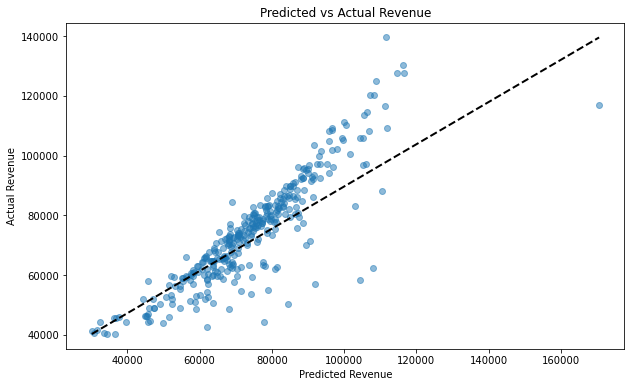

In [14]:
# Plotting y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5)  # Notice the swap here
plt.title('Predicted vs Actual Revenue')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.plot([y_pred.min(), y_pred.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is named df
# Replace NaN values in "Cleaning Fee" column with mean
imputer = SimpleImputer(strategy='mean')
df['Cleaning Fee'] = imputer.fit_transform(df[['Cleaning Fee']])
